# Model Evaluation for Fraud Detection

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import numpy as np

In [9]:
metrics = joblib.load('../data/processed/model_metrics.joblib')
print(metrics)

                    precision    recall        f1   roc_auc    pr_auc  \
random_forest        0.999403  0.999403  0.999403  0.981963  0.869515   
logistic_regression  0.998332    0.9898  0.993554  0.976924  0.746302   
xgboost              0.999381  0.999333  0.999352  0.986573  0.879561   
isolation_forest     0.997097  0.985446  0.991067  0.865103  0.025984   

                             confusion_matrix  
random_forest         [[56847, 17], [17, 81]]  
logistic_regression  [[56293, 571], [10, 88]]  
xgboost               [[56839, 25], [13, 85]]  
isolation_forest     [[56105, 759], [70, 28]]  


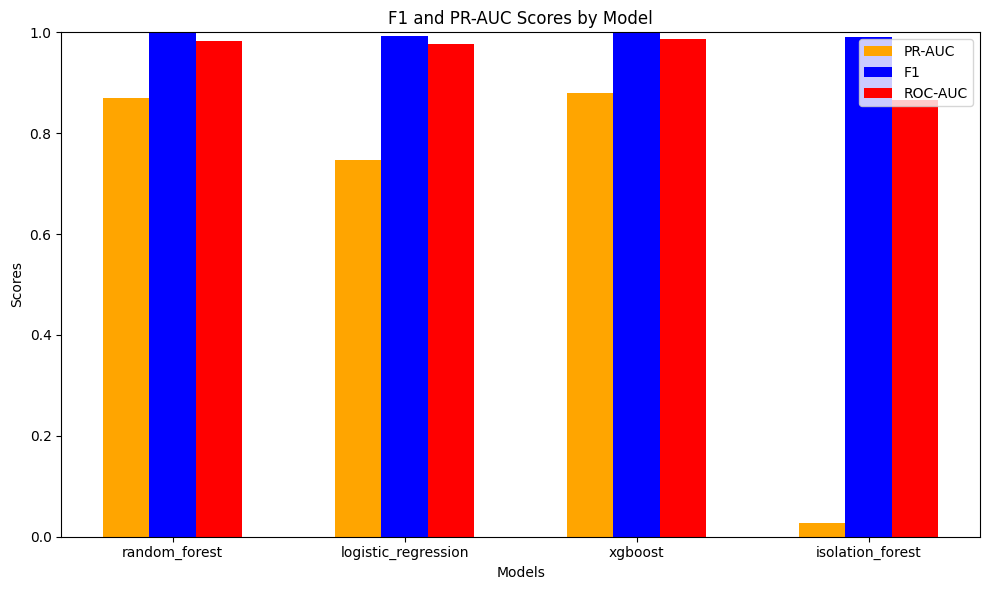

In [48]:
bar_width = 0.2  # Width of the bars
x = np.arange(len(metrics.index))  # The label locations

# Create a figure and axis
plt.figure(figsize=(10, 6))


# Create bars for PR-AUC scores, positioned right next to ROC-AUC bars
plt.bar(x + bar_width, metrics['pr_auc'], width=bar_width, color='orange', label='PR-AUC')

# Create bars for PR-AUC scores, positioned right next to ROC-AUC bars
plt.bar(x + bar_width + bar_width, metrics['f1'], width=bar_width, color='blue', label='F1')

plt.bar(x + bar_width + bar_width + bar_width, metrics['roc_auc'], width=bar_width, color='Red', label='ROC-AUC')

# Add titles and labels
plt.title('F1 and PR-AUC Scores by Model')
plt.ylim(0.0, 1.0)  # Adjusting y-limits to accommodate both metrics
plt.xlabel('Models')
plt.ylabel('Scores')

# Set x-ticks to be the model names, shifted to center between the grouped bars
plt.xticks(x + bar_width*2, metrics.index)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()